# Reliability Engineering

<b> Reliability is defined as the probability of non failure over time (t) which means for how long a machine/system/patient can function properly under constant operating conditions </b>

<b> Data Definition </b> - To conduct this analysis we will use sample data from machines with corresponding failure mainetance time were recorded

<b> Data Snapshot </b>


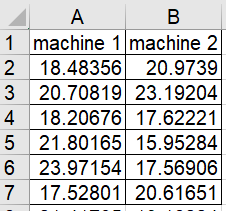

    Machine 1 depicted failure time of 18 weeks, 20 weeks and similarly Machine 2 depicted failure time of 20 weeks and 23 weeks

# Importing Packages

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import reliability
from reliability.Fitters import Fit_Everything

# Reading Data

In [64]:
failure_times = pd.read_csv('failure_times.csv')

In [65]:
failure_times.head()

,machine 1,machine 2
0,18.4836,20.9739
1,20.7082,23.192
2,18.2068,17.6222
3,21.8016,15.9528
4,23.9715,17.5691


# Exploratory Data Analysis

In [66]:
print("Shape of the Data Frame : "+str(failure_times.shape))

Shape of the Data Frame : (100, 2)


## Checking null values

In [67]:
failure_times.isnull().sum()

machine 1    0
machine 2    0
dtype: int64

# Checking Distribution of Failure Times of Both Machines M1 and M2

Text(0, 0.5, 'Frequency')

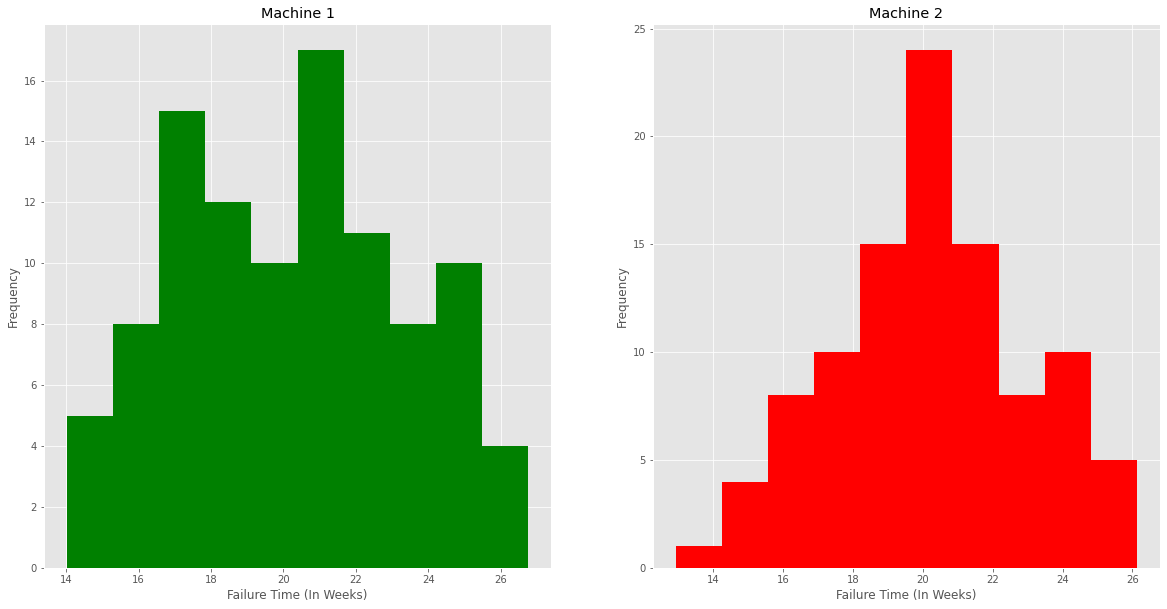

In [68]:
plt.subplot(1,2,1)
plt.hist(failure_times['machine 1'],color = 'green')
plt.title("Machine 1")
plt.xlabel("Failure Time (In Weeks)")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(failure_times['machine 2'],color = 'red')
plt.title("Machine 2")
plt.xlabel("Failure Time (In Weeks)")
plt.ylabel("Frequency")


In [69]:
failure_times.describe()

,machine 1,machine 2
count,100,100
mean,20.2738,20.1857
std,3.19566,2.82453
min,14.0204,12.9348
25%,17.7726,18.4794
50%,20.4037,20.2791
75%,22.2534,21.9617
max,26.7586,26.1262


# Machine 1 - Analysis

Confidence interval estimates of the parameters could not be obtained.
You may want to try fitting the model using a different optimizer.
Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

    Distribution    Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma    Lambda  Log-likelihood    AICc     BIC       AD optimizer
        Gamma_2P 0.505795  40.083                                                                                           -257.451 519.025 524.112  0.71485       TNC
       Normal_2P                                                                          20.2738  3.17964                  -257.571 519.265 524.352  0.73643       TNC
    Lognormal_2P                                                                           2.9968 0.159225                   -257.83 519.784  524.87 0.762099       TNC
      Weibull_3P  8.51086 2.59019 12.7259                                            

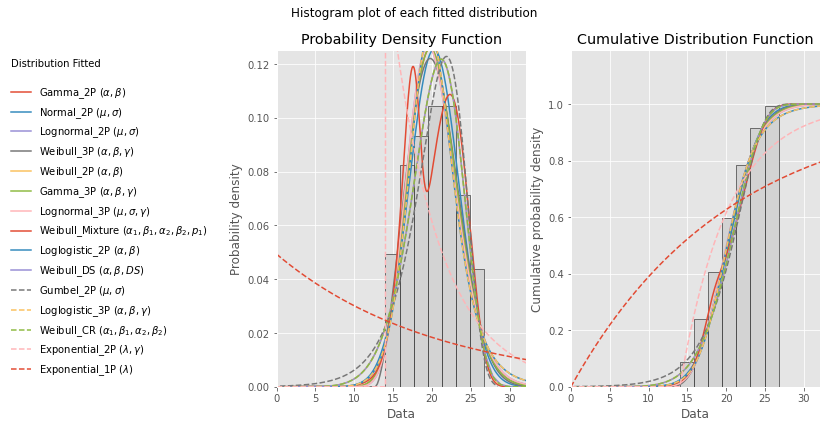

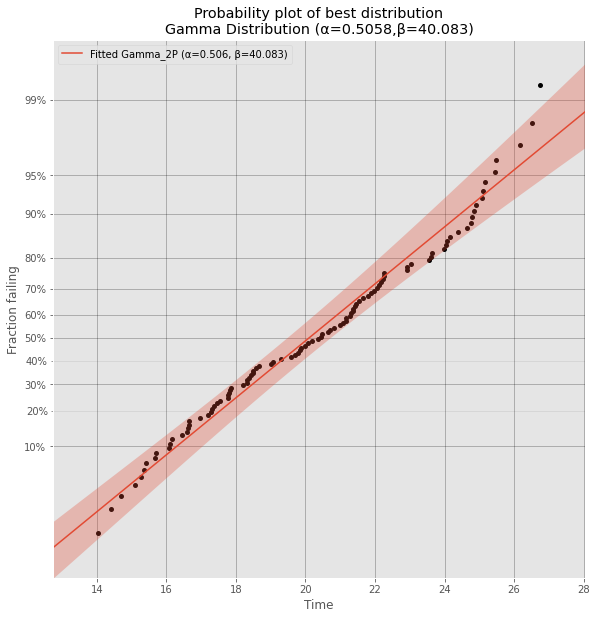

In [70]:
 output = Fit_Everything(failures=failure_times.loc[:,'machine 1'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

## Analysis -
### As we can see 2 parameter Gamma Distribution fits the distribution quite well, with the parameters - alpha - 0.5058 and beta = 40.083

## Visualizing PDF, CDF, Survival Function and Hazard Function

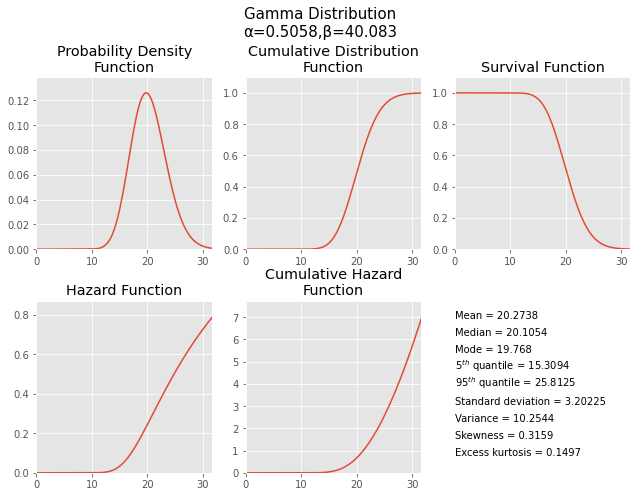

In [71]:
output.best_distribution.plot()


<b> Analysis </b>
The survival of Machine 1 decreases significantly post 25 weeks (0.02) and hence hazrd probability increases as seen by Hazard Function

## Getting Machine 1 reliability after time t = 25 weeks

In [72]:
# Define the desired time of failure 't'
t= float(input("Type in the desired time before failure: "))

Type in the desired time before failure: 25


In [73]:
component_1_reliability = output.best_distribution.SF(t) # Survivial Function

In [74]:
component_1_reliability

0.07687798308889529

# Machine 2 Analysis

Confidence interval estimates of the parameters could not be obtained.
You may want to try fitting the model using a different optimizer.
Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

    Distribution    Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma   Lambda  Log-likelihood    AICc     BIC       AD    optimizer
       Normal_2P                                                                          20.1857  2.81037                 -245.225 494.575 499.661 0.409119          TNC
        Gamma_2P 0.403017 50.0866                                                                                          -246.032 496.187 501.274 0.491368          TNC
      Weibull_2P   21.406 7.95621                                                                                           -246.77 497.664 502.751 0.779714          TNC
    Lognormal_2P                                                             

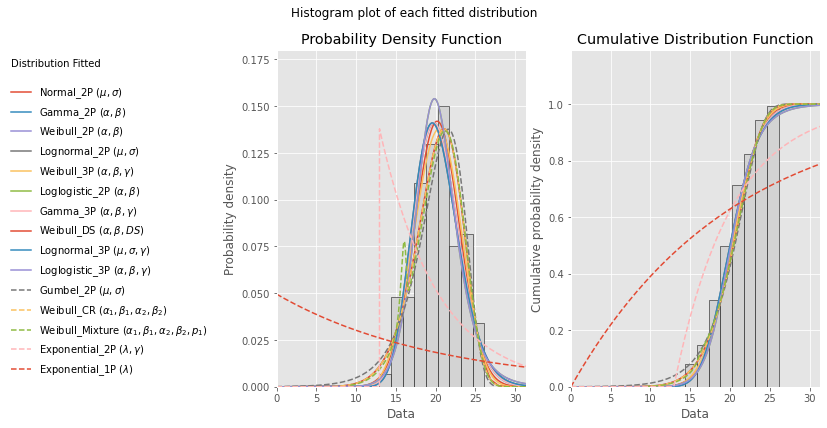

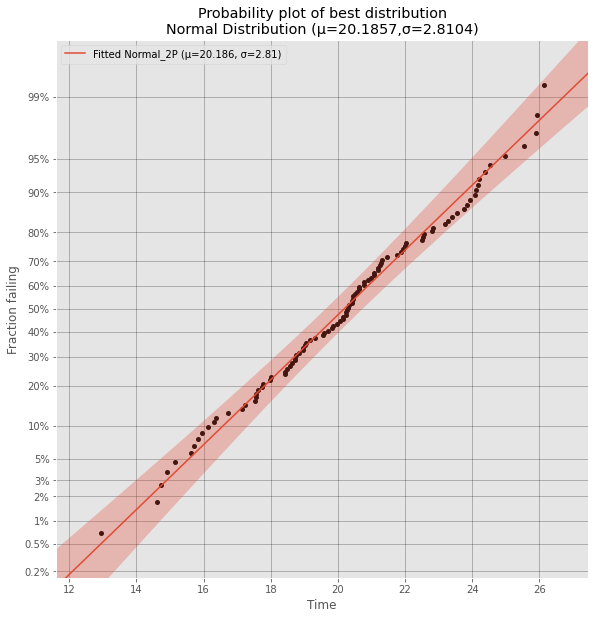

In [75]:
 output_2 = Fit_Everything(failures=failure_times.loc[:,'machine 2'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

## Analysis -
### As we can see normal distrubution with mean  =  20.18 and standard deviation = 2.81 best fits the data we can use normal distribution approximation strategy

## Visualizing PDF, CDF, Survival Function and Hazard Function for Machine 2


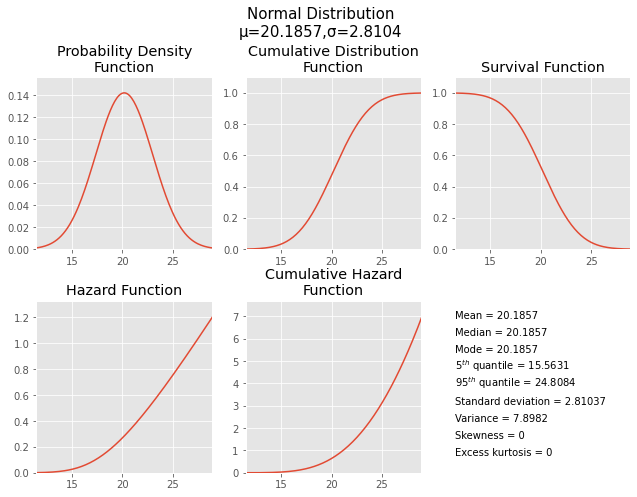

In [76]:
output_2.best_distribution.plot()


<b> Analysis </b>
The survival of Machine 2 decreases significantly post 24 weeks (0.02) and hence hazrd probability increases as seen by Hazard Function

## Getting Machine 2 reliability after time t = 25 weeks

In [77]:
t2= float(input("Type in the desired time before failure: "))

Type in the desired time before failure: 25


In [78]:
component_2_reliability = output_2.best_distribution.SF(t2) # Survival Function

In [79]:
component_2_reliability

0.04335218759080054

# Calculating Serial System Reliability

The reliability of a serial system consists in the product of its individual components reliabilities. It formula can is represented as:


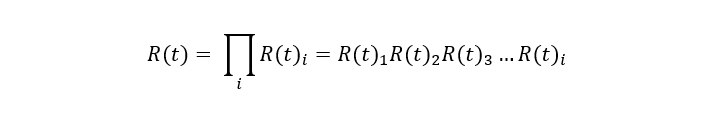

Under this configuration, the overall system reliability can get significantly affected if the reliability any of its individual components is poor due to their strict dependency between each other.



# Calculating System as well as component reliability for t = 0 to t = 32 weeks

In [80]:
time_range = np.arange(1,33)

In [81]:
sys_reliability_list = []
m1_reliability_list = []
m2_reliability_list = []

for i in time_range:
    m1_reliability = output.best_distribution.SF(float(i))
    m2_reliability = output_2.best_distribution.SF(float(i))
    m1_reliability_list.append(m1_reliability)
    m2_reliability_list.append(m2_reliability)
    sys_reliability = m1_reliability*m2_reliability
    sys_reliability_list.append(sys_reliability)
    

Text(0, 0.5, 'Reliability (0-1)')

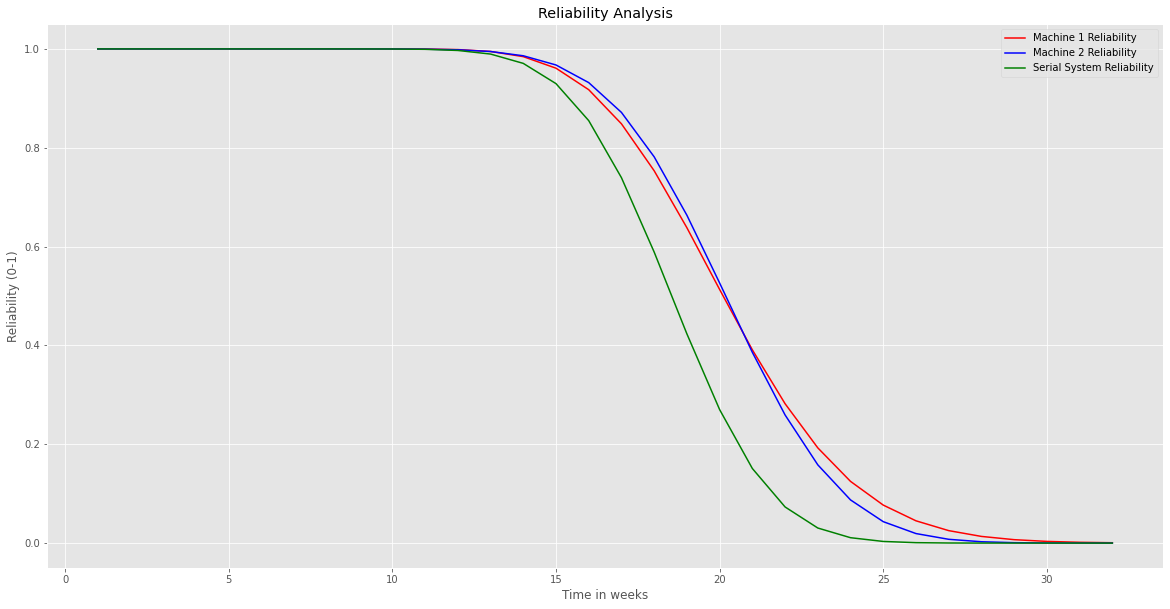

In [82]:
plt.plot(time_range,m1_reliability_list,color = 'red',label = 'Machine 1 Reliability')
plt.plot(time_range,m2_reliability_list,color = 'blue',label = 'Machine 2 Reliability')
plt.plot(time_range,sys_reliability_list,color = 'green',label = 'Serial System Reliability')
plt.legend()
plt.title("Reliability Analysis")
plt.xlabel("Time in weeks")
plt.ylabel("Reliability (0-1)")

# Conclusion -
Overall System Reliability Decreases significantly at approx t = 20 weeks because of Machine 2 Reliability decrement, hence this system might fail after 20 weeks.